In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from backtest_functions_v2 import *

# Import Data

In [ ]:
full = pd.read_parquet('btcusd_daily_price_indicators.parquet', engine='pyarrow')
full

In [ ]:
full['ema_5'] = full['Close'].ewm(span=5, adjust=False).mean()

In [ ]:
D = full.loc['2021-01-01':'2024-12-31']
D

In [10]:
D.columns

Index(['Close', 'High', 'Low', 'Open', 'Volume', 'OBV', 'SMA_10', 'SMA_20',
       'SMA_50', 'EMA_10', 'EMA_20', 'EMA_50', 'MACD', 'MACD_signal_line',
       'MACD_histogram', 'RSI_7', 'RSI_14', 'RSI_21', 'ADX', 'ATR_7', 'ATR_14',
       'ATR_21', 'EMA_5'],
      dtype='object')

# Buy & Hold Return (2021-2024)

In [73]:
df = pd.DataFrame(np.ones((1461,1)), index = D.index, columns = ['signal'])
df

,signal
Date,
2021-01-01,1.0
2021-01-02,1.0
2021-01-03,1.0
2021-01-04,1.0
2021-01-05,1.0
...,...
2024-12-27,1.0
2024-12-28,1.0
2024-12-29,1.0


Overall Annual Return: 33.87%
Overall Annual Sharpe Ratio: 0.5474
Maximum Drawdown: -76.63 %
Win/Loss Ratio: 1.0
Alpha: 0.0
Beta: 1.0

Yearly Metrics:
   year  yearly_return  yearly_std  yearly_beta  yearly_alpha  yearly_sharpe
0  2021       0.623428    0.804536          1.0           0.0       0.774891
1  2022      -0.651369    0.634633          1.0           0.0      -1.026372
2  2023       1.656669    0.439680          1.0           0.0       3.767896
3  2024       1.133341    0.533875          1.0           0.0       2.122857


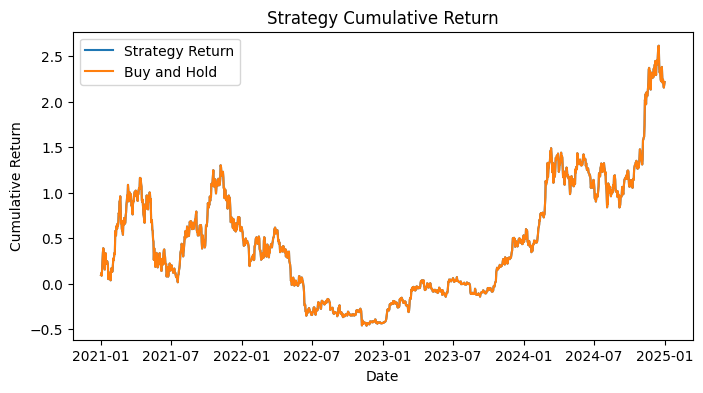

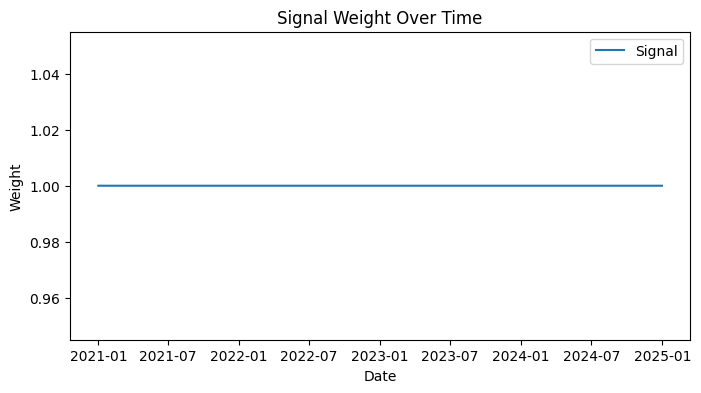

In [75]:
run_backtest(df)

# Golden Cross

In [ ]:
sma_200 = full['close'].rolling(window=200).mean()

# temp =pd.concat([D['SMA_50'],SMA_200], axis=1, keys=['SMA_50', 'SMA_200'])
# temp = temp.loc['2021-01-01':'2024-12-31']

temp =pd.concat([D['sma_50'],sma_200, D['close'], D['ema_5']], axis=1, keys=['SMA_50', 'SMA_200', 'Close', 'EMA_5'])
temp = temp.loc['2021-01-01':'2024-12-31']

temp

,SMA_50,SMA_200,Close,EMA_5
Date,,,,
2021-01-01,20615.851328,13484.657568,29374.152344,28313.597170
2021-01-02,20932.040508,13597.603784,32127.267578,29584.820640
2021-01-03,21266.318203,13714.112627,32782.023438,30650.554906
2021-01-04,21586.644727,13826.912993,31971.914062,31091.007958
2021-01-05,21932.171094,13950.435049,33992.429688,32058.148534
...,...,...,...,...
2024-12-27,95426.964063,70991.144727,94164.859375,96236.503190
2024-12-28,95799.333125,71130.304219,95163.929688,95878.978689
2024-12-29,96134.360312,71256.749414,93530.226562,95096.061314


In [ ]:
df = pd.DataFrame(np.where((temp['sma_50']>temp['sma_200']) & (temp['close'] > temp['ema_5']), 1, 0))
df.columns = ['signal']
df.index = temp.index

df

,signal
Date,
2021-01-01,1
2021-01-02,1
2021-01-03,1
2021-01-04,1
2021-01-05,1
...,...
2024-12-27,0
2024-12-28,0
2024-12-29,0


Overall Annual Return: 35.63%
Overall Annual Sharpe Ratio: 1.0764
Maximum Drawdown: -31.17 %
Win/Loss Ratio: 0.89
Alpha: 0.2465
Beta: 0.2859

Yearly Metrics:
   year  yearly_return  yearly_std  yearly_beta  yearly_alpha  yearly_sharpe
0  2021       0.989892    0.466297     0.335876      0.523155       2.122877
1  2022      -0.010515    0.042616     0.004454     -0.005882      -0.246747
2  2023       0.000371    0.296640     0.454545     -0.444438       0.001252
3  2024       0.717108    0.361413     0.456563      0.194570       1.984177


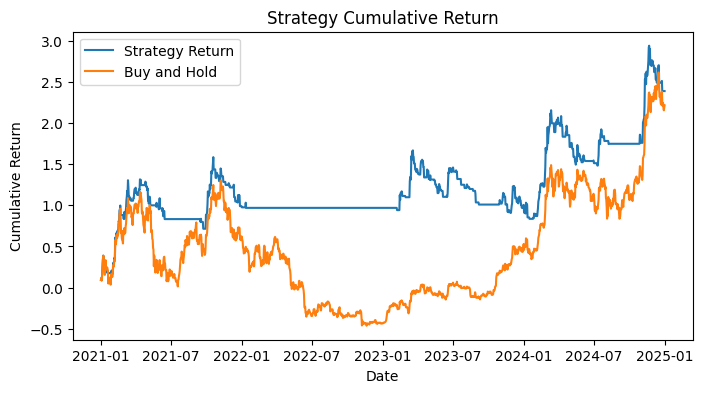

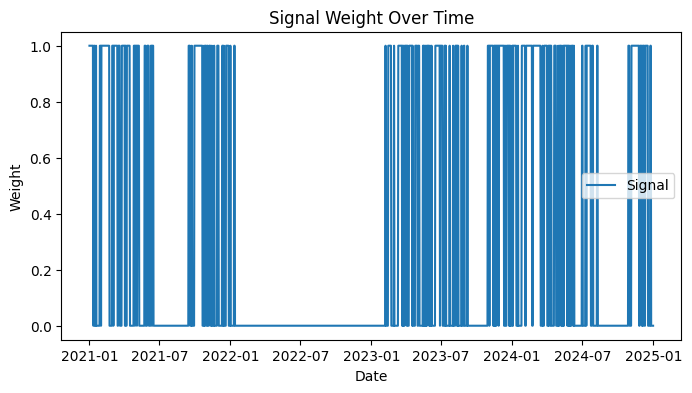

In [14]:
run_backtest(df)

# Fibonacci 5, 8, 13

In [ ]:
# Add 5, 8, 13 EMA 

ema_5 = full['close'].ewm(span=5, adjust=False).mean()
ema_8 = full['close'].ewm(span=8, adjust=False).mean()
ema_13 = full['close'].ewm(span=13, adjust=False).mean()

ema = pd.concat([D['close'],ema_5, ema_8, ema_13], axis=1, keys=['close','ema_5', 'ema_8', 'ema_13'])
ema = ema.loc['2021-01-01':'2024-12-31']

ema

,Close,EMA_5,EMA_8,EMA_13
Date,,,,
2021-01-01,29374.152344,28313.597170,27455.355985,26219.169370
2021-01-02,32127.267578,29584.820640,28493.558561,27063.183400
2021-01-03,32782.023438,30650.554906,29446.550756,27880.160548
2021-01-04,31971.914062,31091.007958,30007.742602,28464.696764
2021-01-05,33992.429688,32058.148534,30893.228621,29254.372896
...,...,...,...,...
2024-12-27,94164.859375,96236.503190,96946.161288,97670.536543
2024-12-28,95163.929688,95878.978689,96550.109821,97312.449849
2024-12-29,93530.226562,95096.061314,95879.024652,96772.132237


In [ ]:
condition = ema[(ema['ema_5'] > ema['ema_8']) & 
                (ema['ema_8'] > ema['ema_13'])
                & (ema['close'] > ema['ema_5'])] # & (ema['Close'] > ema['EMA_5'])

df = pd.DataFrame(np.where(D.index.isin(condition.index), 1, 0), index = D.index, columns=['signal'])



Overall Annual Return: 40.13%
Overall Annual Sharpe Ratio: 1.1593
Maximum Drawdown: -43.36 %
Win/Loss Ratio: 0.95
Alpha: 0.2781
Beta: 0.3127

Yearly Metrics:
   year  yearly_return  yearly_std  yearly_beta  yearly_alpha  yearly_sharpe
0  2021       1.153959    0.463343     0.331920      0.604809       2.490506
1  2022      -0.286640    0.245142     0.148072     -0.181528      -1.169281
2  2023       0.473268    0.300982     0.464668     -0.066775       1.572411
3  2024       0.702435    0.335905     0.394107      0.233491       2.091172


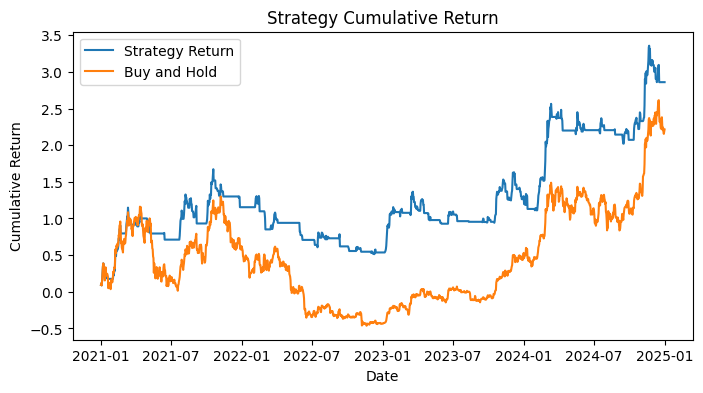

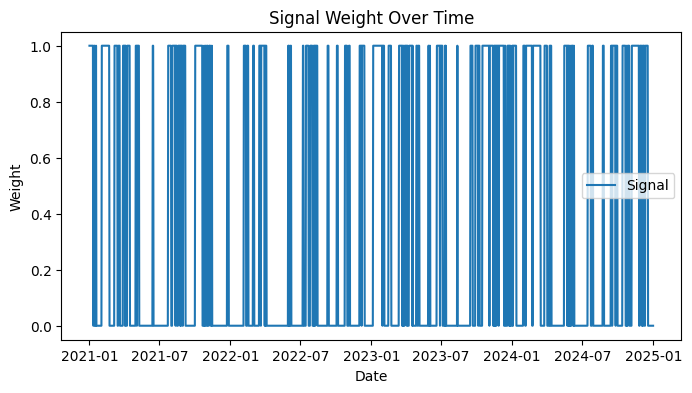

In [19]:
run_backtest(df)

# MACD uptrend + ADX

In [ ]:
df = full.copy()
df['ema_5'] = df['close'].ewm(span=5, adjust=False).mean()
df = df.loc['2021-01-01':'2024-12-31']


macd = df[df['macd_histogram'] > 0]
adx = df[df['adx'] > 25]
ema = df[(df['close'] > df['ema_5'])]

condition = D.index.isin(macd.index) & D.index.isin(adx.index)  & D.index.isin(ema.index) 

df = pd.DataFrame(np.where(condition, 1, 0), index = D.index, columns=['signal'])   

Overall Annual Return: 39.36%
Overall Annual Sharpe Ratio: 1.23
Maximum Drawdown: -40.72 %
Win/Loss Ratio: 0.98
Alpha: 0.2879
Beta: 0.2671

Yearly Metrics:
   year  yearly_return  yearly_std  yearly_beta  yearly_alpha  yearly_sharpe
0  2021       1.115317    0.424816     0.278919      0.612126       2.625410
1  2022      -0.335475    0.259777     0.166343     -0.232982      -1.291395
2  2023       0.577027    0.262946     0.353588      0.109858       2.194470
3  2024       0.700316    0.301659     0.317471      0.290103       2.321549


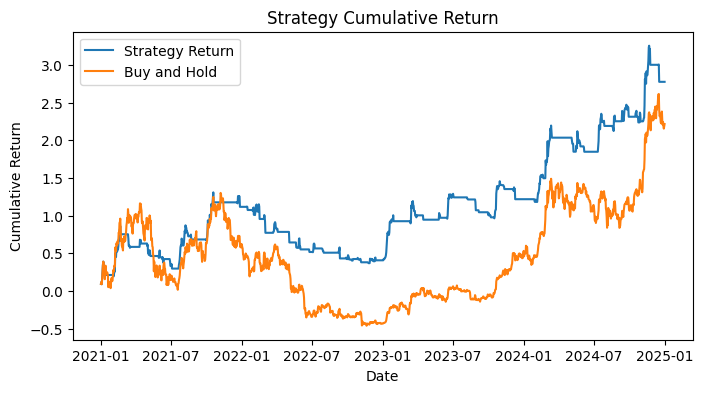

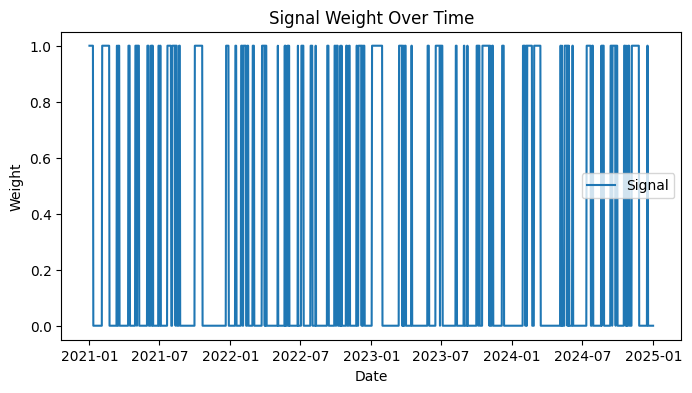

In [21]:
run_backtest(df)

# SMA uptrend + RSI

In [ ]:
# Bull market when RSI_14 > 50
# Long when SMA_5 > SMA_50 and close > EMA_5

df = full.copy()
df['ema_5'] = df['close'].ewm(span=5, adjust=False).mean()
df['sma_5'] = df['close'].rolling(window=5).mean()
df = df.loc['2021-01-01':'2024-12-31']

bull = df[df['rsi_14']>40]
long = df[(df['sma_5'] > df['sma_50'])& (df['close'] > df['sma_5'])] # & (df['Close'] > df['EMA_5'])

condition = df.index.isin(bull.index) & df.index.isin(long.index) 

df = pd.DataFrame(np.where(condition, 1, 0), index = df.index, columns=['signal'])

Overall Annual Return: 57.02%
Overall Annual Sharpe Ratio: 1.6776
Maximum Drawdown: -31.02 %
Win/Loss Ratio: 0.99
Alpha: 0.4363
Beta: 0.3018

Yearly Metrics:
   year  yearly_return  yearly_std  yearly_beta  yearly_alpha  yearly_sharpe
0  2021       1.600825    0.459295     0.327041      0.795629       3.485399
1  2022      -0.219386    0.168895     0.069846     -0.173804      -1.298948
2  2023       0.700361    0.316641     0.514566      0.027799       2.211847
3  2024       0.760411    0.347782     0.422709      0.245183       2.186460


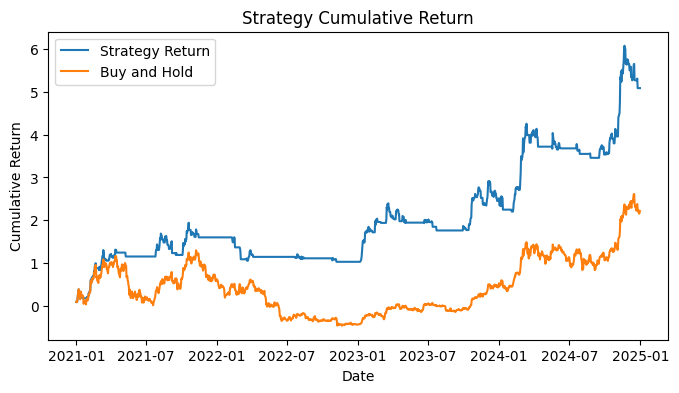

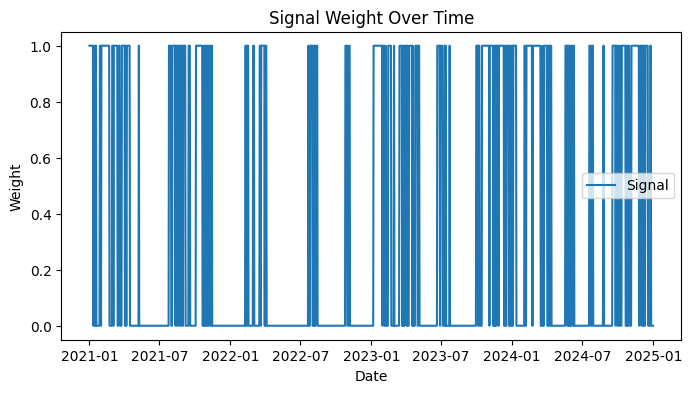

In [23]:
run_backtest(df)

# MACD uptrend + RSI

In [ ]:
df = full.copy()
df['ema_5'] = df['close'].ewm(span=5, adjust=False).mean()
df = df.loc['2021-01-01':'2024-12-31']

rsi = df[(df['rsi_14'] > 40)]
macd = df[(df['mscd_histogram'] > 0)]
ema = df[(df['close'] > df['ema_5'])]

condition = np.where((D.index.isin(macd.index)) 
                     & (D.index.isin(rsi.index))  
                     & (D.index.isin(ema.index)), 1, 0) # & (D.index.isin(ema.index))

df = pd.DataFrame(condition, index = D.index, columns=['signal'])

Overall Annual Return: 37.37%
Overall Annual Sharpe Ratio: 1.0944
Maximum Drawdown: -38.27 %
Win/Loss Ratio: 0.94
Alpha: 0.256
Beta: 0.3042

Yearly Metrics:
   year  yearly_return  yearly_std  yearly_beta  yearly_alpha  yearly_sharpe
0  2021       0.795879    0.451702     0.314866      0.431298       1.761956
1  2022      -0.267487    0.288495     0.205583     -0.094690      -0.927181
2  2023       0.743957    0.281040     0.404522      0.160779       2.647155
3  2024       0.551719    0.315595     0.347513      0.175943       1.748189


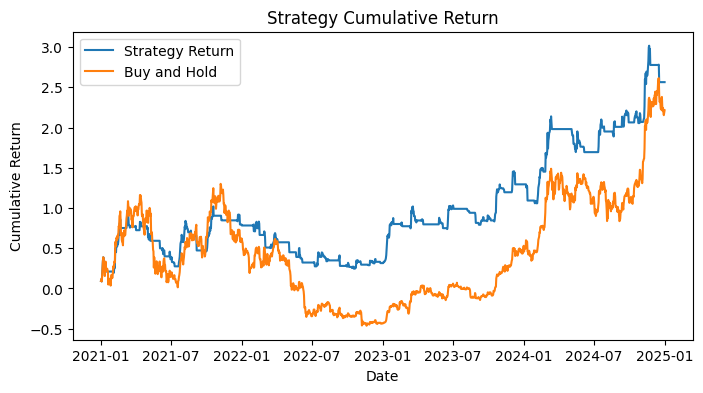

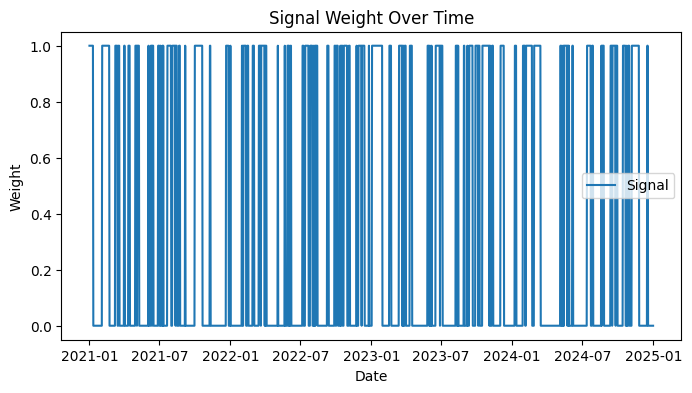

In [25]:
run_backtest(df)